In [1]:
from pylab import*
from numpy import*
%matplotlib inline

Para este problema tomaremos una carga de valor $q = 4\pi \epsilon_0$. Para agregar la contribución del potencial culombiano tenemos que sólo agregar un término en la parte radial ya que la angular no se ve afectada por simetría. Sabemos que el potencial culombiano va como $\frac{1}{r^2}$ y por el cambio de variable del problema 1 $r = p_1$

\begin{align}
\dot{r}^2 + r^2\dot{\theta}^2 < 1 & & \dot{r}^2 + r^2\dot{\theta}^2 > 1 \\
\left(\begin{array}{c} \dot{p_1}\\ \dot{q_1}\\ \dot{p_2} \\ \dot{q_2} \end{array}\right) = \left(\begin{array}{c} p_2  \\ q_2 \\ (q_2^2 - \frac{k}{m})p_1 - \frac{\gamma}{m} p_2 + \frac{1}{p_1^2}\\  -(2\frac{p_2}{p_1} + \frac{\gamma}{m})q_2 \end{array}\right)  
& &
\left(\begin{array}{c} \dot{p_1}\\ \dot{q_1}\\ \dot{p_2} \\ \dot{q_2} \end{array}\right) = \left(\begin{array}{c} p_2  \\ q_2 \\ (q_2^2 - \frac{k}{m})p_1 - \frac{\mu}{m}((p_2^2+p_1^2q_2^2)^{3/4}) p_2 + \frac{1}{p_1^2} \\  -(2\frac{p_2}{p_1} + \frac{\mu}{m}(p_2^2+p_1^2q_2^2)^{3/4})q_2 \end{array}\right) 
\end{align}

In [2]:
def rk4j(ec,p_ini,x,args=0,h=0.01):
    #if (x[1]-x[0]) <= 5.*h:
    while (x[1]-x[0]) <= 5.*h: 
        h = (x[1]-x[0])/10
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i])
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    else:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i],args)
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h,args)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    return tiempos,sol

In [25]:
def polares_mov_carga(r, t, args=[1.,1.,1.,0.1,0.2]):  
    #r = [r, theta, dr, dtheta]
    m , q , k , gamma , mu = args[0] , args[1] , args[2] , args[3] , args[4] 
    p1, q1, p2, q2 = r[0], r[1], r[2], r[3]  
    norm_v = sqrt(p2**2 +(p1*q2)**2) 
    
    dp1, dq1 = p2, q2
        
    if p1 != 0 and norm_v <=1 : 
        
        dp2 = (q2**2-(k/m))*p1 - (gamma/m)*p2 + (1/(p1**2.))
        dq2 = -(2*(p2/p1) + (gamma/m))*q2
    
    elif p1 != 0 and norm_v >1 :
        
        dp2 = (q2**2 - (k/m))*p1 -((mu/m)*p2*(norm_v)**(3/2)) + (1/(p1**2.))
        dq2 = -(2*(p2/p1) + (mu/m)*q2*(norm_v)*(1.5))
    
    elif p1 == 0 and norm_v <= 1 : 
        
        dp2 = (q2**2-(k/m))*p1 - ((gamma/m)*p2) + (1/(p1**2.))
        dq2 = 0                                     #Esto paso porque en la primera version de este codigo no
                                                    #corria la parte de polares con las condiciones iniciales
                                                    #por tener una division entre cero, entonces hay que hacer 4 casos
    else : 
        
        dp2 = (q2**2 - (k/m))*p1 -((mu/m)*p2*(norm_v)**(1.5)) + (1/(p1**2))
        dq2 = 0
        
    return array([dp1, dq1, dp2, dq2])


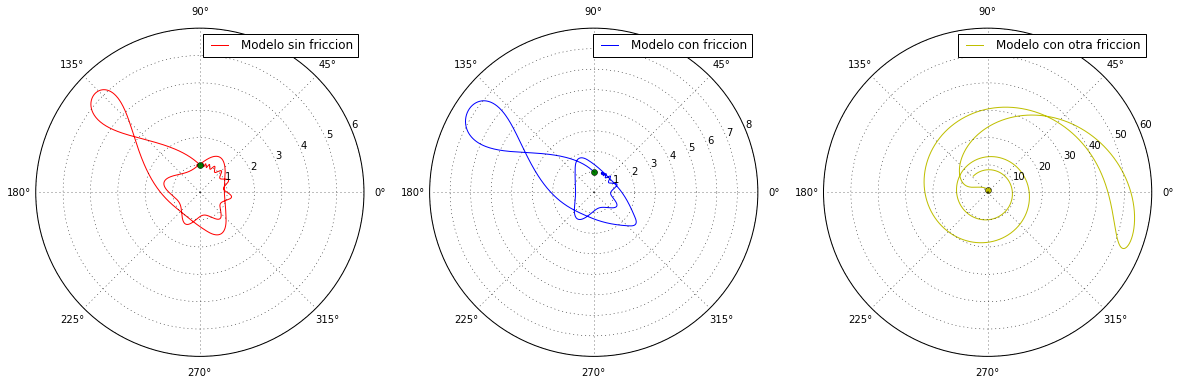

In [26]:
cond_ini = [1, pi/2 , 5 , 5] # cond_ini = [x,y,vx,vy]
t_f = 100

fig = figure(figsize=(20,20))
ax = fig.add_subplot(131, projection = 'polar')
bx = fig.add_subplot(132, projection = 'polar')
cx = fig.add_subplot(133, projection = 'polar')
grid(True)

#tres casos de este problema:

#sin friccion
t_carga, sol_carga = rk4j(polares_mov_carga, cond_ini, [0,t_f])
ax.plot(sol_carga[:,1], sol_carga[:,0], label = 'Modelo sin friccion', color = 'r')
ax.plot(pi/2,1,'o',color = 'g') #el  punto 

#con friccion
t_cargaf, sol_cargaf = rk4j(polares_mov_carga, cond_ini, [0,t_f],[1.,1.,1.,0.2,0.1])
bx.plot(sol_cargaf[:,1], sol_cargaf[:,0], label = 'Modelo con friccion')
bx.plot(pi/2,1,'o') #el  punto 

#con mas friccion y otras cargas
t_cargaf, sol_cargaf = rk4j(polares_mov_carga, cond_ini, [0,t_f],[15.,3.,0.5,0.4,0.8])
cx.plot(sol_cargaf[:,1], sol_cargaf[:,0], label = 'Modelo con otra friccion', color = 'y')
cx.plot(pi/2,1,'o', color = 'y') #el  punto 

ax.legend()
bx.legend()
cx.legend()
show()

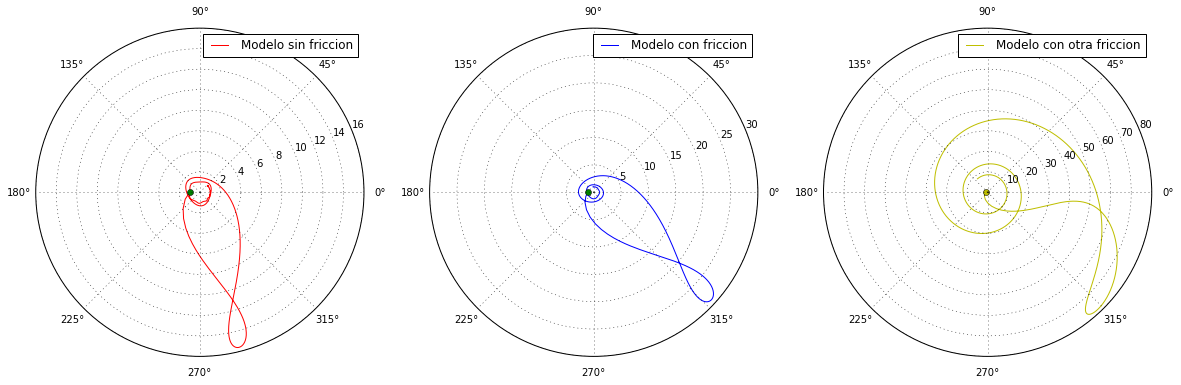

In [27]:
cond_ini = [1, pi , 50 , 50] # cond_ini = [x,y,vx,vy]
t_f = 100

fig = figure(figsize=(20,20))
ax = fig.add_subplot(131, projection = 'polar')
bx = fig.add_subplot(132, projection = 'polar')
cx = fig.add_subplot(133, projection = 'polar')
grid(True)

#tres casos de este problema:

#sin friccion
t_carga, sol_carga = rk4j(polares_mov_carga, cond_ini, [0,t_f])
ax.plot(sol_carga[:,1], sol_carga[:,0], label = 'Modelo sin friccion', color = 'r')
ax.plot(pi,1,'o',color = 'g') #el  punto 

#con friccion
t_cargaf, sol_cargaf = rk4j(polares_mov_carga, cond_ini, [0,t_f],[1.,1.,1.,0.2,0.1])
bx.plot(sol_cargaf[:,1], sol_cargaf[:,0], label = 'Modelo con friccion')
bx.plot(pi,1,'o') #el  punto 

#con mas friccion y otras cargas
t_cargaf, sol_cargaf = rk4j(polares_mov_carga, cond_ini, [0,t_f],[15.,3.,0.5,0.4,0.8])
cx.plot(sol_cargaf[:,1], sol_cargaf[:,0], label = 'Modelo con otra friccion', color = 'y')
cx.plot(pi,1,'o', color = 'y') #el  punto 

ax.legend()
bx.legend()
cx.legend()
show()

Vemos que en los casos anteriores la trayectoria tiende a estar cerrada y en realidad no se cierra porque la integración termina antes, pero si le diéramos una cantidad de pasos mayor se cerrarían, la cosa es que cuando le metí mas pasos mi computadora se quedó pensando mucho tiempo. 

Lo que pasa es que siempre vamos a tener la fuerza de Coulomb pero también un resorte (k) entonces va a haber un equilibrio entre las dos fuerzas y eso va a hacer que la trayectoria permanezca cerrada. 